<a href="https://colab.research.google.com/github/AyozeGS/IABD/blob/main/SNS/UT4/T1/Ayoze_Gil_Sosa_Act_4_1_Segmentacion_Statlog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ayoze Gil Sosa

# Instalación de paquetes

In [1]:
!pip install ucimlrepo

In [2]:
# Librerías para tratamiento y visualización de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
# Librerías para trabajar con modelos de entranamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

### Instalación del repositorio de la universidad UC Irvine

# Carga de datos

Opciones a elegir:

* Desde el repositorio de UC Irvine
* Desde Github

## Cargar desde UC Irvine

In [157]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# metadatos
statlog_german_credit_data .metadata

{'uci_id': 144,
 'name': 'Statlog (German Credit Data)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data',
 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv',
 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 1000,
 'num_features': 20,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1994,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5NC77',
 'creators': ['Hans Hofmann'],
 'intro_paper': None,
 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in

In [158]:
#variables
statlog_german_credit_data.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


In [159]:
statlog_german_credit_data.data.keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [160]:
original_data = statlog_german_credit_data.data.original
original_data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


## Cargar desde archivo csv en Github

Podemos elegir el archivo german.data con datos categóricos en formato cadena o el dataset con losdatos numéricos. En ambos casos las columnas

In [161]:
#variable para seleccionra origen
github_path = 'https://raw.githubusercontent.com/AyozeGS/IABD/main/SNS/UT4/T1/resources/statlog_german_credit_data/german.data'

original_data = pd.read_csv(github_path, delim_whitespace=True, header=None)
original_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


A continuación cambiamos el nombre de la columnas, necesario si queremos que el dataset en este punto sea independiente de la fuente. Los datos de github no contienen cabeceras así que queremos añadirlos como aparecen en el dataset de la UCI.

In [162]:
# Editamos los nombres de las columnas a "AtrributeX" para cada columna excepto la columna class
original_data.columns = ["Attribute" + str(i) for i in range(1,21)] + ['class']
original_data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


# Normalización

En primer lugar, como nos enfrentamos a un modelo de segmentación y en esta ocasión no nos encontramos ante un problema de clasificación, eliminaremos la columna destinada a etiquetar los datos.

In [163]:
#Eliminamos la columna de target del dataset original
if 'class' in original_data.columns:
  original_label = original_data['class']
  original_data.drop(['class'], axis=1, inplace=True)
original_data.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


Además, guardaremos estos datos para el final y haremos una copia del dataset.

In [48]:
data = original_data.copy()
data.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


El siguiente paso es comprobar que no haya valores nulos

In [49]:
# Comprobación de valores nulos y NaN, máximos y mínimos para cada característica en el dataset de entrenamiento
pd.DataFrame({
  "Tipo": [data[column].dtype for column in data.columns],
  "Train Null ": data.isnull().sum(),
  "Train Nan": data.isna().sum(),
})

,Tipo,Train Null,Train Nan
Attribute1,object,0,0
Attribute2,int64,0,0
Attribute3,object,0,0
Attribute4,object,0,0
Attribute5,int64,0,0
Attribute6,object,0,0
Attribute7,object,0,0
Attribute8,int64,0,0
Attribute9,object,0,0
Attribute10,object,0,0


A continuación editamos los datos para aquellas columnas categóricas, aplicando una forma distinta a que como se ha hecho otras veces por la particularidad del dataset.

En este caso, su valor es el carácter A, el número de columna y el valor de la categoría. En este caso eliminamos las dos primeras partes y pasamos los valores enteros. Lo hacemos de forma separada para las columnas por debajo y encima del 9 por el nñumero de careacteres a recortar.

In [50]:
# Editamos las columnas en el caso de que hayamos cargado datos categóricos de la fuente.
data.iloc[:, :9] = data.iloc[:, :9].applymap(lambda cell: int(cell[2:]) if isinstance(cell, str) else cell) #Columna hasta la 9
data.iloc[:, 9:] = data.iloc[:, 9:].applymap(lambda cell: int(cell[3:]) if isinstance(cell, str) else cell) #Columna desde la 9
data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,1,6,4,3,1169,5,5,4,3,1,4,1,67,3,2,2,3,1,2,1
1,2,48,2,3,5951,1,3,2,2,1,2,1,22,3,2,1,3,1,1,1
2,4,12,4,6,2096,1,4,2,3,1,3,1,49,3,2,1,2,2,1,1
3,1,42,2,2,7882,1,4,2,3,3,4,2,45,3,3,1,3,2,1,1
4,1,24,3,0,4870,1,3,3,3,1,4,4,53,3,3,2,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,2,1736,1,4,3,2,1,4,1,31,3,2,1,2,1,1,1
996,1,30,2,1,3857,1,3,4,1,1,4,2,40,3,2,1,4,1,2,1
997,4,12,2,3,804,1,5,4,3,1,4,3,38,3,2,1,3,1,1,1
998,1,45,2,3,1845,1,3,4,3,1,4,4,23,3,3,1,3,1,2,1


Finalmente editamos el tipo de las columnas a enteros para que guarde correlación con los datos modificados.

In [51]:
# Comprobamos los tipos de columnas que hay antes del cambio
print(data.dtypes.value_counts())

object    13
int64      7
Name: count, dtype: int64


In [54]:
# Comvertimos el tipo de las columnas.
for column in data.columns:
  if data[column].dtype == 'object':
      data[column] = pd.Categorical(data[column]).codes
      data[column] = data[column].astype('int64')

# Comprobamos los tipos de columnas que hay después del cambio
print(data.dtypes.value_counts())

int64    20
Name: count, dtype: int64


Cuando los atributos de los datos se encuentran en diferentes escalas el modelo puede introducir sesgos hacia los atributos con mayor rango de variación. Por ello, si no se normalizan los datos, un modelo de dará más peso a la característica de mayor rango y esta tendrá más influencia en la medición de similitud.

Es por ello que vamos a escalar todas las columnas entre 0 y 1.

In [ ]:
unscaled_data = data.copy()

In [61]:
# Escalamos los datos entre 0 y 1 para cada columna del dataset
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,0.000000,0.029412,1.00,0.333333,0.050567,1.00,1.00,1.000000,0.666667,0.0,1.000000,0.000000,0.857143,1.0,0.5,0.333333,0.666667,0.0,1.0,0.0
1,0.333333,0.647059,0.50,0.333333,0.313690,0.00,0.50,0.333333,0.333333,0.0,0.333333,0.000000,0.053571,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0
2,1.000000,0.117647,1.00,0.666667,0.101574,0.00,0.75,0.333333,0.666667,0.0,0.666667,0.000000,0.535714,1.0,0.5,0.000000,0.333333,1.0,0.0,0.0
3,0.000000,0.558824,0.50,0.222222,0.419941,0.00,0.75,0.333333,0.666667,1.0,1.000000,0.333333,0.464286,1.0,1.0,0.000000,0.666667,1.0,0.0,0.0
4,0.000000,0.294118,0.75,0.000000,0.254209,0.00,0.50,0.666667,0.666667,0.0,1.000000,1.000000,0.607143,1.0,1.0,0.333333,0.666667,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.50,0.222222,0.081765,0.00,0.75,0.666667,0.333333,0.0,1.000000,0.000000,0.214286,1.0,0.5,0.000000,0.333333,0.0,0.0,0.0
996,0.000000,0.382353,0.50,0.111111,0.198470,0.00,0.50,1.000000,0.000000,0.0,1.000000,0.333333,0.375000,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0
997,1.000000,0.117647,0.50,0.333333,0.030483,0.00,1.00,1.000000,0.666667,0.0,1.000000,0.666667,0.339286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0
998,0.000000,0.602941,0.50,0.333333,0.087763,0.00,0.50,1.000000,0.666667,0.0,1.000000,1.000000,0.071429,1.0,1.0,0.000000,0.666667,0.0,1.0,0.0


# Clustering

## Coeficiente de silueta (silhouette score)

Para determinar el número de clusters podemos hacer uso de la técnica del
coeficiente de silueta. Dicho valor mide lo similar que es una muestra u objeto respecto a su propio cluster en comparación con el resto de clústeres.

El rango de valores para cada muestra está entre 1 y -1. Mientras mayor sea el valor mejor emparejado está y mejor será el coeficiente de silueta que mide de forma conjunta todas las muestras.

In [62]:
X = data.copy()

### Coeficiente de silueta con K-Means

Utilizando el coeficiente de silueta para determinar el mejor número de clústers observamos que la puntuación desciende a medida que aumentan los clústers, indicándonos que la mejor forma de segmentar a los clientes y dónde todos los clientes tengan un buen índice de emparejamiento es haciendo pocos grupos.

In [175]:
# Establemecemos un límite para realizar una prospección del coeficiente de Silueta (silhouette score)
limit = 20

for k in range(2, limit + 1):
    model = KMeans(n_clusters = k, n_init='auto', random_state=42)
    model.fit(X)
    pred = model.predict(X)
    score = silhouette_score(X, pred)

    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

# Cuanto más alto es el score mejor agrupamiento cluster obtendremos

Silhouette Score for k = 2: 0.092
Silhouette Score for k = 3: 0.095
Silhouette Score for k = 4: 0.101
Silhouette Score for k = 5: 0.099
Silhouette Score for k = 6: 0.102
Silhouette Score for k = 7: 0.097
Silhouette Score for k = 8: 0.094
Silhouette Score for k = 9: 0.093
Silhouette Score for k = 10: 0.076
Silhouette Score for k = 11: 0.091
Silhouette Score for k = 12: 0.097
Silhouette Score for k = 13: 0.092
Silhouette Score for k = 14: 0.094
Silhouette Score for k = 15: 0.093
Silhouette Score for k = 16: 0.090
Silhouette Score for k = 17: 0.086
Silhouette Score for k = 18: 0.082
Silhouette Score for k = 19: 0.085
Silhouette Score for k = 20: 0.087


Podemos usar la técnica de la silueta para ver la distribución en la puntuación en los diferentes clústeres y observar si existen muchos valores etiquetadas en un grupo y con puntuación negativa.

Podemos contrastar, que efectivamente con menos clústeres se obtienen los mejores coeficiente y además no se observan muestras con valores negativos, teniendo además las peores de las muestras una puntuación bastante decente.

A medida que aumenta el número de clúster se va observando como cada vez más individuos van adquieriendo una puntuación negativa.

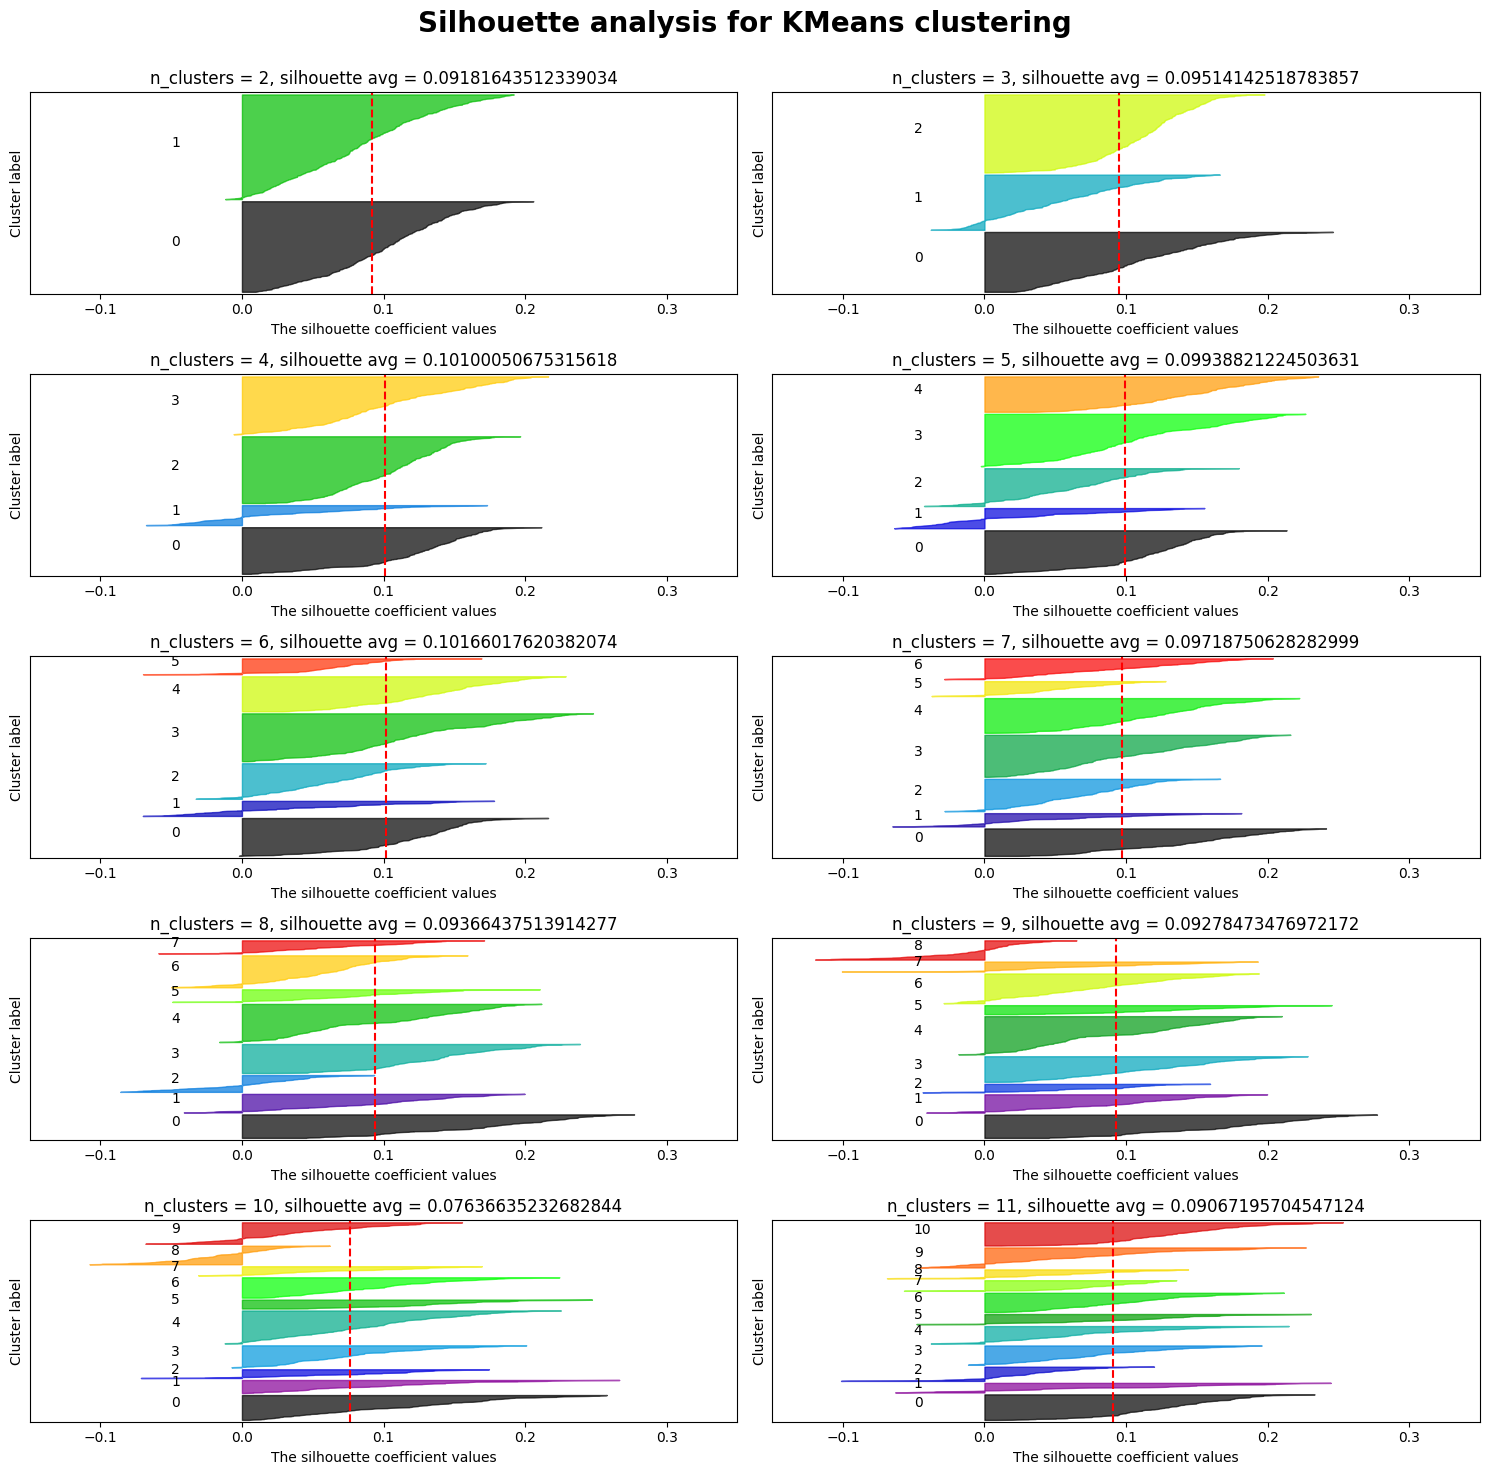

In [177]:
nrows = 5
ncols = 2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,15))

#Máximo número de clusters a comparar
limit = 11

for n_clusters in range(2, limit + 1):
    # Crea una subparcela con 1 fila y 2 columnas
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    ax_row = (n_clusters-2) // ncols
    ax_column = (n_clusters-2) % ncols
    ax1 = ax[ax_row][ax_column]

    # La primera subtrama es la trama de silueta
    # El coeficiente de silueta puede oscilar entre -1, 1
    ax1.set_xlim([-1, 1])
    # El (n_clusters + 1) * 10 es para insertar un espacio en blanco entre la silueta
    # parcelas de conglomerados individuales, para demarcarlas claramente.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicialice el clusterer con el valor n_clusters y un generador aleatorio
    # semilla de 10 para reproducibilidad.
    clusterer = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # Silhouette_score da el valor promedio de todas las muestras.
    # Esto da una perspectiva de la densidad y separación de la forma
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Calcule las puntuaciones de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agregue las puntuaciones de silueta para muestras pertenecientes a
        # agrupe i, y ordénelos
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquete las parcelas de silueta con sus números de grupo en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcule el nuevo y_lower para la siguiente parcela
        y_lower = y_upper + 10  # 10 para las 0 muestras

    ax1.set_title(f"n_clusters = {n_clusters}, silhouette avg = {silhouette_avg}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # La línea vertical para la puntuación de silueta promedio de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_xlim([-0.15, 0.35])
    ax1.set_yticks([])  # Borrar las etiquetas / ticks de yaxis
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3])

# Ajustar el layout y el padding del título principal
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta la recta para dejar espacio para el título


fig.suptitle("Silhouette analysis for KMeans clustering", fontsize=20, fontweight='bold')
plt.show()

### Coeficiente de silueta con DBSCAN

La misma técnica puede ser aplicada con DBSCAN, modificando en este caso dos parámetros:

* Epsilon (eps): El radio de los círculos alrededor de cada grupo de datos
* Muestras mínimas (min_samples): El mínimo número de individuos para formar un clúster.

Hay que tener en cuenta que con esta técnica pueden haber individuos sin grupo, que se etiquetarán como -1.

Parece que la epsilon es el parámetro más importante a la hora de elegir los clústeres y mientras mayor mejor es la puntuación pero menor el número de clusters. Por otro lado si es muy pequeña aparecen demasiados outliers y el número de clúster también baja o literalmente no se pueden segmentar los datos en grupos.

Respecto al número de muestras, mientras se permitan grupos más pequeños crece ligeramente la puntuación a partir de cierta epsilon, a exceptión del valor 1. Sin embargo, el número de grupos que aparecen es absurdo.

Existe algunas combinaciones de epsilon/samples para las que no puede realizarse el clustering y no puede obtenese una puntuación.

<ipython-input-144-99cdf494bf00>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', 10)


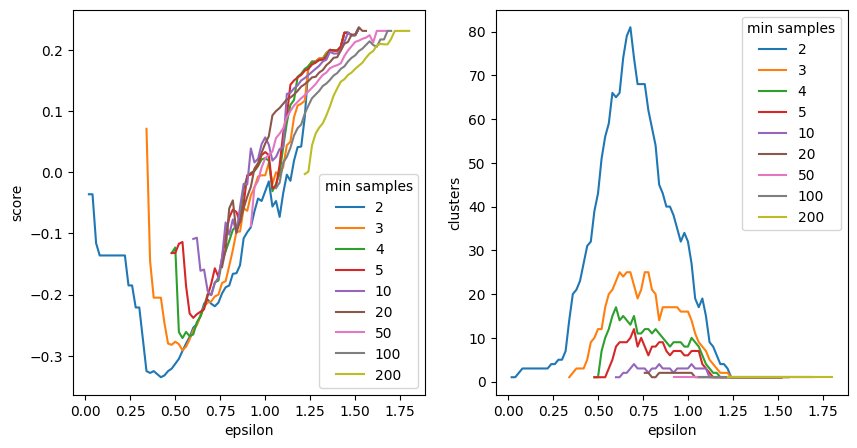

In [144]:
# Establemecemos los valores de los parámetros a comparar
min_samples = [2,3,4,5,10,20,50,100,200]
colors = cm.get_cmap('tab10', 10)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for index, min_samples in enumerate(min_samples):
  eps_list = []
  score_list = []
  clusters_list = []
  for epsilon in range(1, 100):
    # Entrenamos el modelo para cada combinación omitiendo aquellas
    # en las que no se puede realizar la segmentación
    try:
      eps = epsilon/50
      model = DBSCAN(eps=eps, min_samples=min_samples)
      model.fit(X)
      pred = model.fit_predict(X)
      score = silhouette_score(X, pred)
      # Guardamos los valores a representar
      clusters_list.append(len(np.unique(pred[pred != -1])))
      eps_list.append(eps)
      score_list.append(round(score,3))
      #print('Silhouette Score for eps = {:<.2f}, min_samples = {}: {:<.3f}'.format(eps, min_samples, score))
    except:
      pass

  # Añadimos los plots
  ax[0].plot(eps_list, score_list, color=colors(index), label=min_samples)
  ax[1].plot(eps_list, clusters_list, color=colors(index), label=min_samples)

ax[0].set_ylabel('score')
ax[0].set_xlabel('epsilon')
ax[0].legend(title="min samples")

ax[1].set_ylabel('clusters')
ax[1].set_xlabel('epsilon')
ax[1].legend(title="min samples")

Si observamos las siluetas de algunos de las combinaciones más representativas podemos observar el por qué de algunas cosas.

Por un lado con valores de epsilon bajo hay pocos grupos porque aparecen muchos outliers debido a que el radio es pequeño. Por otro lado, con valores de epsilon elevados bajan los outliers pero disminuye demasiado el número de clústers.

Además, se observa un desbalanceo en las muestras de cada grupo, que junto con la cantidad de outliers hace que este método de segmentación no sea interesante para este problema.

Hay que tener en cuenta que a esta técnica le afecta la la dimensionalidad y por ello no es buena si no hemos seleccionado un número reducido de columnas.

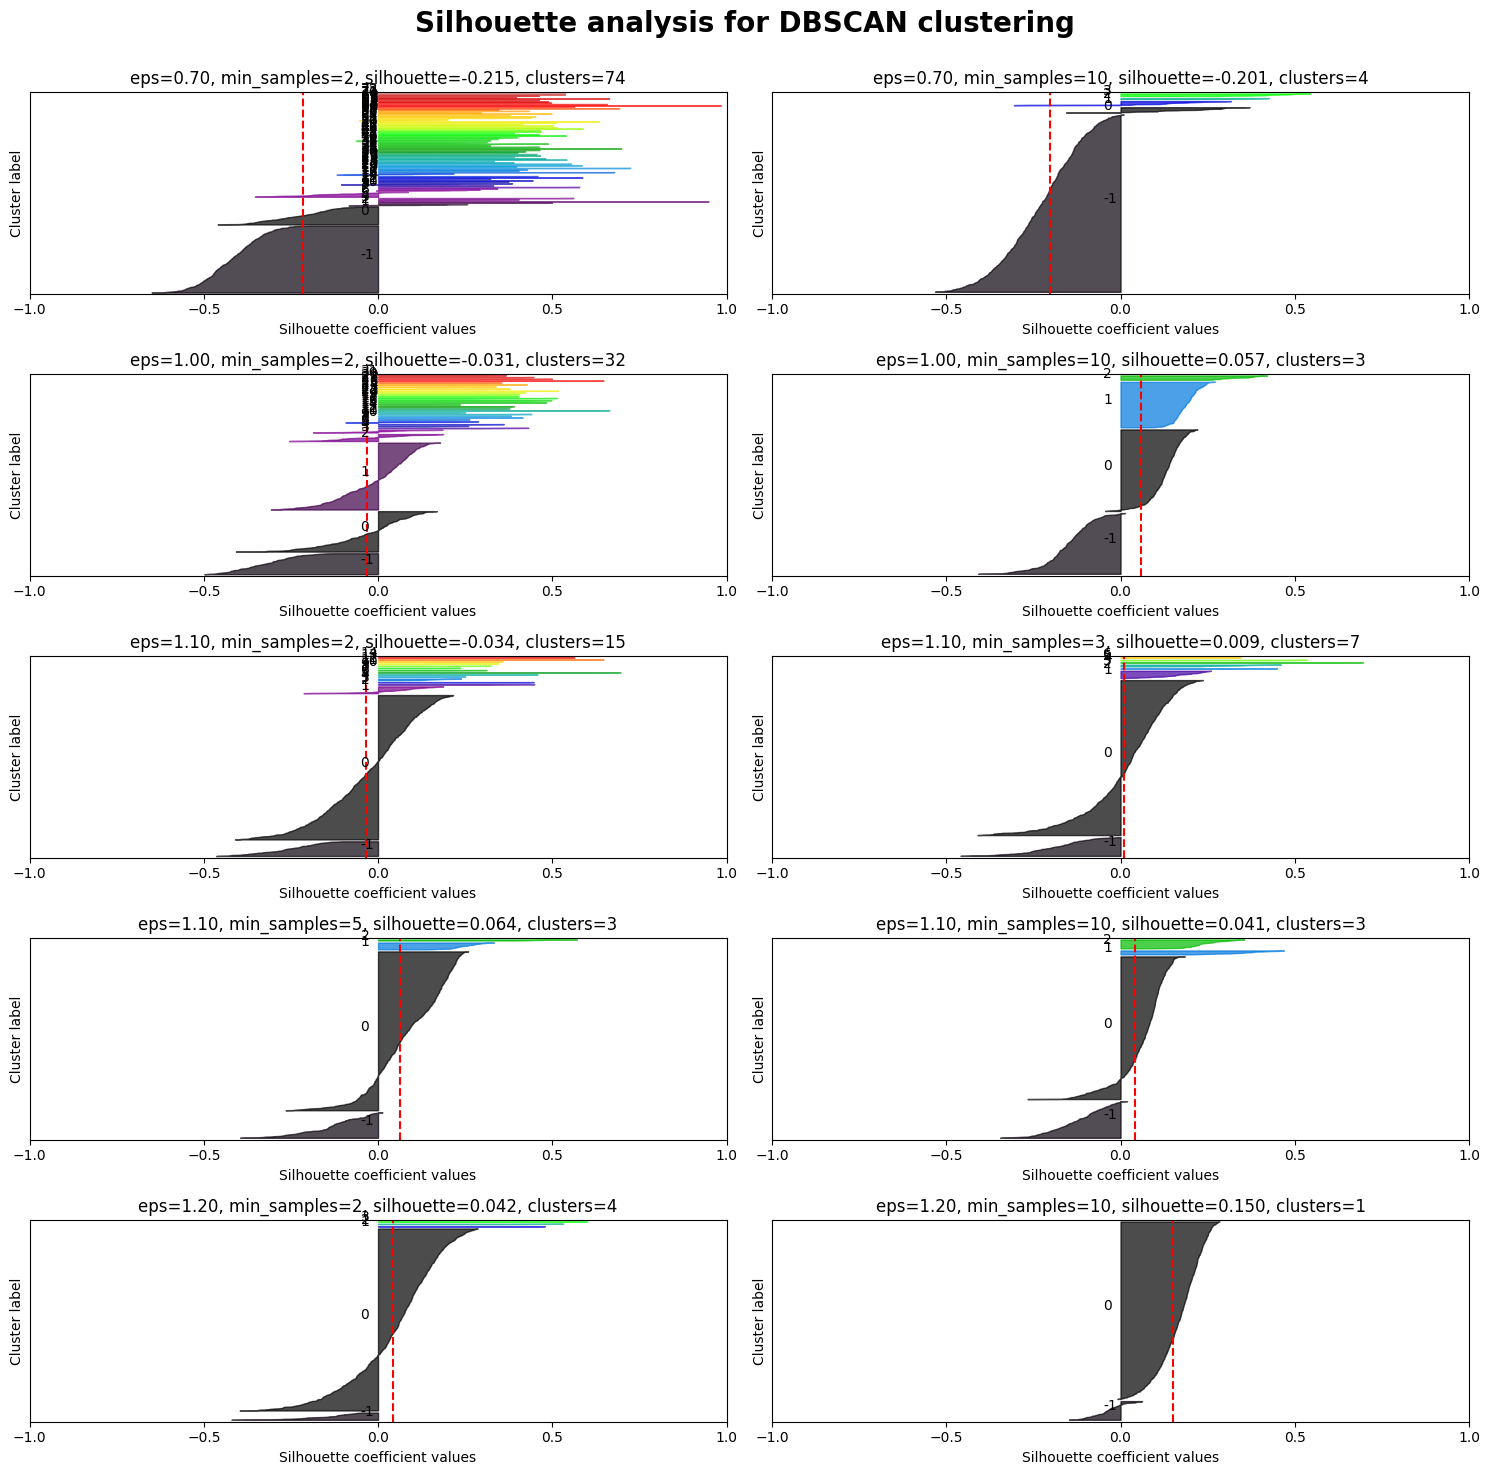

In [150]:
nrows = 5
ncols = 2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 15))

# Elegimos algunos valores para eps y min_samples
eps_values = [0.7, 0.7, 1, 1, 1.1, 1.1, 1.1, 1.1, 1.2, 1.2]
min_samples_values = [2, 10, 2, 10, 2, 3, 5, 10, 2, 10]

plot_number = 0

# Bucle para cada combinación de epsilon y min_samples
for eps, min_samples in zip(eps_values, min_samples_values):
    ax_row = plot_number // ncols
    ax_column = plot_number % ncols
    ax1 = ax[ax_row, ax_column]

    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + len(np.unique(eps_values)) * 10])

    # Hallamos las labels que predice el modelo
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)

    # Filtramos las muestras de ruido antes de calcular la puntuación de silueta
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(X, cluster_labels)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        # Para cada cluster pintamos la silueta
        y_lower = 10
        for i in np.unique(cluster_labels):
            #if i == -1:
            #    continue
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / len(np.unique(cluster_labels)))

            if i == -1:
              color = cm.nipy_spectral(1)

            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title(f"eps={eps:.2f}, min_samples={min_samples}, silhouette={silhouette_avg:.3f}, clusters={len(np.unique(cluster_labels[cluster_labels != -1]))}")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        plot_number += 1
    else:
        ax1.text(0.5, 0.5, 'No valid clustering', verticalalignment='center', horizontalalignment='center', transform=ax1.transAxes)

    # Ajuste de los márgenes de los gráficos
    ax1.set_xlim([-0.7, 0.7])
    ax1.set_ylim([0, y_upper + 5])
    ax1.set_yticks([])
    ax1.set_xticks([-1, -0.5, 0, 0.5, 1])



fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Silhouette analysis for DBSCAN clustering", fontsize=20, fontweight='bold')
plt.show()

## Elección de modelo

En base a las puntuaciones obtenidas con el coeficiente de silueta, nos quedaremos con el modelo K-Means para realizar la segmentación.

Nos vamos a quedar con 2 casos:

* El de 2 clusters por ser los grupos del dataset original.
* El de 4, por tener más valores y poder observar los clústeres.

In [178]:
# Instancia y entrenamiento con Kmeans con 2 clusteres.
clusterer_kmeans_2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
labels_kmeans_2 = clusterer_kmeans_2.fit_predict(X)
pd.Series(labels_kmeans_2).value_counts()

1    536
0    464
Name: count, dtype: int64

In [185]:
# Instancia y entrenamiento con Kmeans con 4 clusteres.
clusterer_kmeans_4 = KMeans(n_clusters=4, n_init='auto', random_state=42)
labels_kmeans_4 = clusterer_kmeans_4.fit_predict(X)
pd.Series(labels_kmeans_4).value_counts()

2    349
3    302
0    244
1    105
Name: count, dtype: int64

Además, instanciaremos también un modelo de dbscan con epsilon=1 y min_samples=10 para observar los outliers.

In [262]:
# Instancia y entrenamiento con DBSCAN.
clusterer_dbscan = DBSCAN(eps=1, min_samples=10)
labels_dbscan = clusterer_dbscan.fit_predict(X)
pd.Series(labels_dbscan).value_counts()

 0    424
-1    316
 1    237
 2     23
Name: count, dtype: int64

## Reducción de dimesionalidad

Si aplicamos la técnica de la reducción de dimensionalidad podremos reducir el número de características proyectando dichos datos en dos o tres dimensiones para poder visualizarlos.

Esta técnica permite comprimir información encontrando las componentes de las características que explican la mayor cantidad de varianza. Y también permite observar que características tienen mayor peso en cada una de las componentes.

In [180]:
X_pca = X.copy()

# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca_2 = PCA(n_components = 2)
X_pca_2 = pca_2.fit_transform(X_pca)
# Mostramos el porcentaje de varianza explicada por cada uno de los componentes seleccionados.
print(pca_2.explained_variance_ratio_)

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca_2.components_), columns=['PC-1', 'PC-2'], index=X.columns)

[0.15393261 0.11108865]


,PC-1,PC-2
Attribute1,0.199993,0.748345
Attribute2,0.088077,-0.071921
Attribute3,0.066207,0.167070
Attribute4,0.046894,-0.027889
Attribute5,0.098085,-0.065458
Attribute6,0.223873,0.500656
Attribute7,0.144003,0.125480
Attribute8,0.076003,0.016342
Attribute9,0.026059,0.030717
Attribute10,-0.078067,-0.067630


Una vez obtenidos los datos con dimensiones reducidas, podemos representarlos en 2 dimensiones.

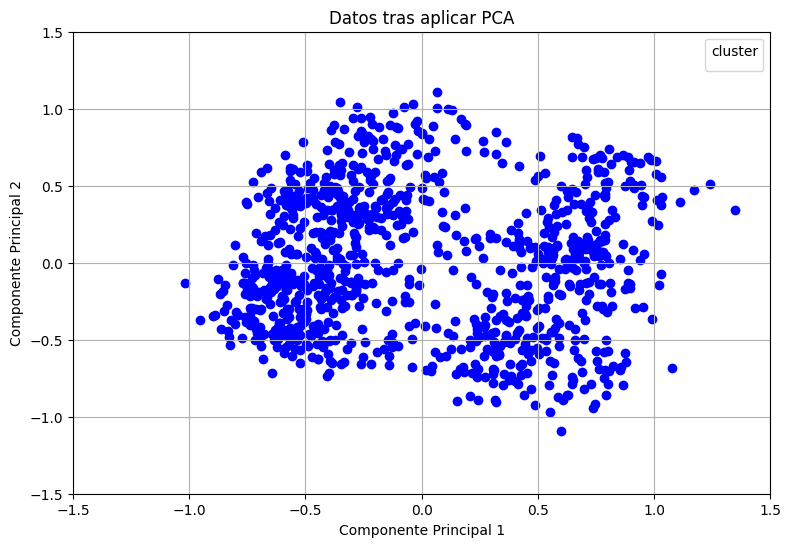

In [256]:
# Visualizar el dataset utilizando las dos dimensiones obtenidas en el PCA
plt.figure(figsize=(9, 6))
plt.scatter(X_pca_2.T[0], X_pca_2.T[1], color="b")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.legend(title="cluster")
plt.title("Datos tras aplicar PCA")
plt.show()

Y ahroa que podemos visualizar los datos, podemos representarlos por colores en función de las etiquetas obtenidas por los algoritmos anteriores, empezando por K-Means con 2 clústeres donde se diferencian muy claramente los dos grupos.

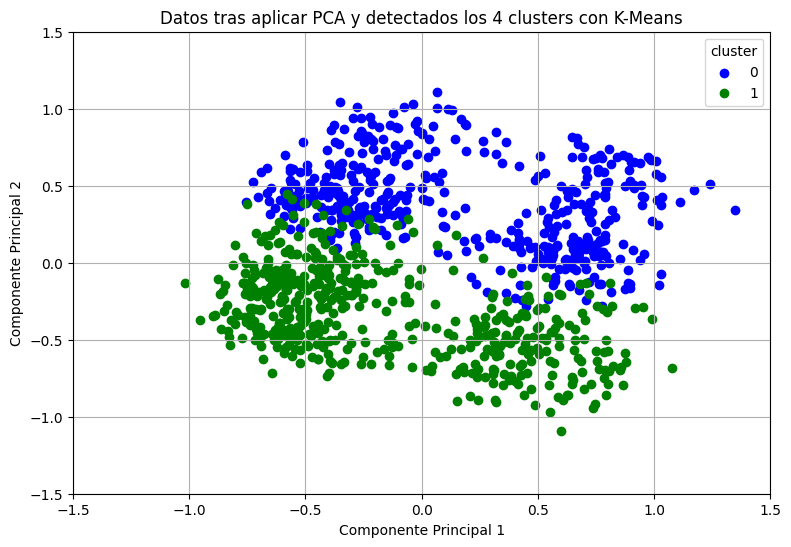

In [229]:
colores = np.array([x for x in 'bgrcmyk'])
colores = np.hstack([colores] * 7)

plt.figure(figsize=(9, 6))

# Obtener los labels únicos para garantizar que cada cluster solo se añada una vez a la leyenda
unique_labels = np.unique(labels_kmeans_2)

for label in unique_labels:
  # Seleccionar puntos que pertenecen al cluster actual
  cluster_points = X_pca_2[labels_kmeans_2 == label]
  # Graficar puntos de este cluster
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colores[label], label=label)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.legend(title="cluster")
plt.title("Datos tras aplicar PCA y detectados los 4 clusters con K-Means")
plt.show()

Seguimos con K-Means con 4 clústeres, donde el clúster número 1 no es fácilmente distinguible en 2 dimensiones.

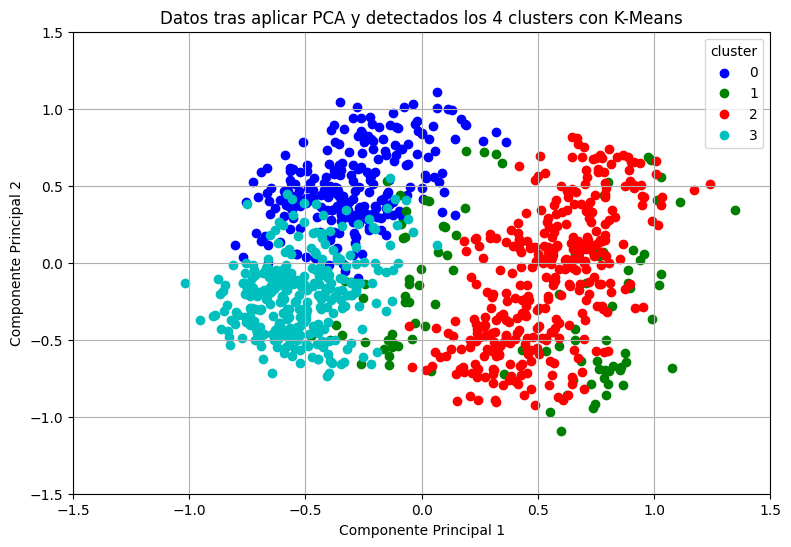

In [216]:
colores = np.array([x for x in 'bgrcmyk'])
colores = np.hstack([colores] * 7)

plt.figure(figsize=(9, 6))

# Obtener los labels únicos para garantizar que cada cluster solo se añada una vez a la leyenda
unique_labels = np.unique(labels_kmeans_4)

for label in unique_labels:
  # Seleccionar puntos que pertenecen al cluster actual
  cluster_points = X_pca_2[labels_kmeans_4 == label]
  # Graficar puntos de este cluster
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colores[label], label=label)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.legend(title="cluster")
plt.title("Datos tras aplicar PCA y detectados los 4 clusters con K-Means")
plt.show()

Si hacemos de nuevo la reducción de componentes a 3 componentes podemos repetir el proceso y ver los datos en 3 dimensiones.

In [210]:
# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca_3 = PCA(n_components = 3)
X_pca_3 = pca_3.fit_transform(X_pca)
# Mostramos el porcentaje de varianza explicada por cada uno de los componentes seleccionados.
print(pca_3.explained_variance_ratio_)

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca_3.components_), columns=['PC-1', 'PC-2', 'PC-3'], index=X.columns)

[0.1539326  0.11108858 0.09185046]


,PC-1,PC-2,PC-3
Attribute1,0.200014,0.748256,-0.208407
Attribute2,0.088109,-0.071988,0.039248
Attribute3,0.066200,0.167286,0.027681
Attribute4,0.046872,-0.027825,-0.032739
Attribute5,0.098111,-0.065507,-0.028782
Attribute6,0.223884,0.500671,0.168011
Attribute7,0.144016,0.125490,0.342931
Attribute8,0.076020,0.016315,0.324464
Attribute9,0.025935,0.030669,0.070658
Attribute10,-0.077901,-0.067978,-0.001602


Con ello, ahora si observamos tanto los clúster de K-Means para 2 y 4  grupos respectivamente.

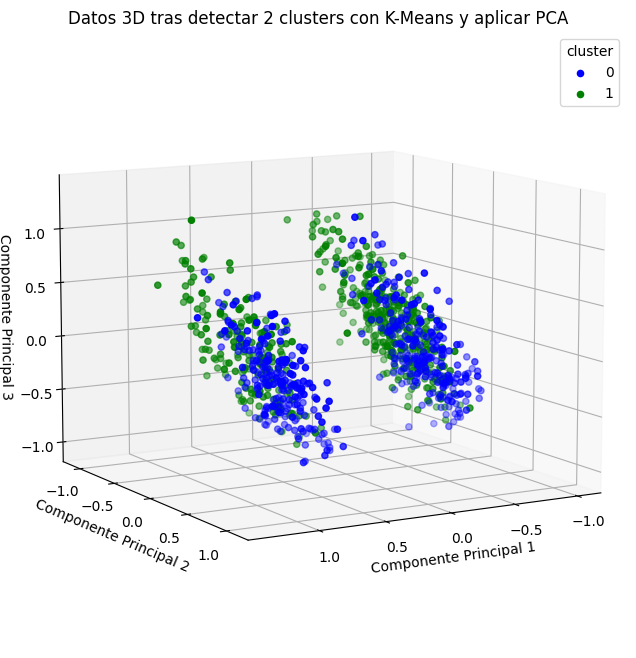

In [284]:
# Crear figura y eje tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtener los labels únicos para garantizar que cada cluster solo se añada una vez a la leyenda
unique_labels = np.unique(labels_kmeans_2)

for label in unique_labels:
    # Seleccionar puntos que pertenecen al cluster actual
    indices = labels_kmeans_2 == label
    cluster_points = X_pca_3[indices]
    # Graficar puntos de este cluster en 3D
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], color=colores[label], label=label)

# Ajustar ángulos de vista para una mejor visualización
ax.view_init(elev=10, azim=60)

# Ajustes de la vista del gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title("Datos 3D tras detectar 2 clusters con K-Means y aplicar PCA")
ax.legend(title='cluster')

# Mostrar el gráfico
plt.show()

En el caso de 4 grupos, vemos que el grupo 1 ahora es distinguible, aunque parece que pudiese dividirse en otros dos grupos distintos.

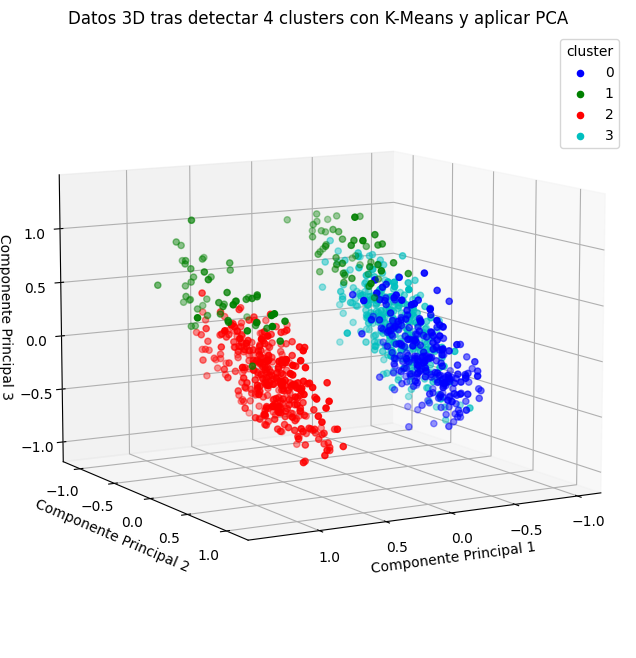

In [283]:
# Crear figura y eje tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtener los labels únicos para garantizar que cada cluster solo se añada una vez a la leyenda
unique_labels = np.unique(labels_kmeans_4)

for label in unique_labels:
    # Seleccionar puntos que pertenecen al cluster actual
    indices = labels_kmeans_4 == label
    cluster_points = X_pca_3[indices]
    # Graficar puntos de este cluster en 3D
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], color=colores[label], label=label)

# Ajustar ángulos de vista para una mejor visualización
ax.view_init(elev=10, azim=60)

# Ajustes de la vista del gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title("Datos 3D tras detectar 4 clusters con K-Means y aplicar PCA")
ax.legend(title='cluster')

# Mostrar el gráfico
plt.show()

Si hacemos el mismo procedimiento en 2 y 3 dimensiones pra DBSCAN, podemos observar la gran cantidad de outliers.

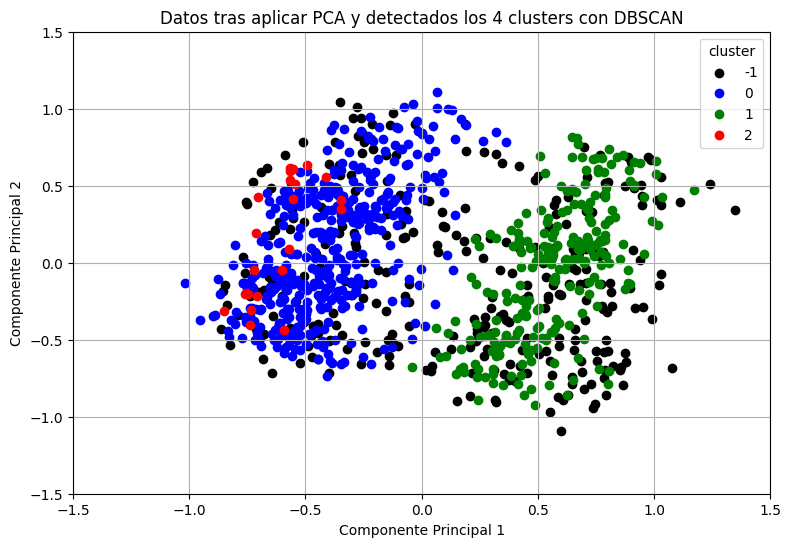

In [257]:
colores = np.array([x for x in 'bgrcmyk'])
colores = np.hstack([colores] * 7)

plt.figure(figsize=(9, 6))

# Obtener los labels únicos para garantizar que cada cluster solo se añada una vez a la leyenda
unique_labels = np.unique(labels_dbscan)

for label in unique_labels:
  # Seleccionar puntos que pertenecen al cluster actual
  cluster_points = X_pca_2[labels_dbscan == label]
  # Graficar puntos de este cluster
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colores[label], label=label)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.legend(title="cluster")
plt.title("Datos tras aplicar PCA y detectados los 4 clusters con DBSCAN")
plt.show()

Y concretamente en la visualización en 3 dimensiones llama la atención como los outliers están bastante cercanos ahora que se ha reducido la dimensionalidad.

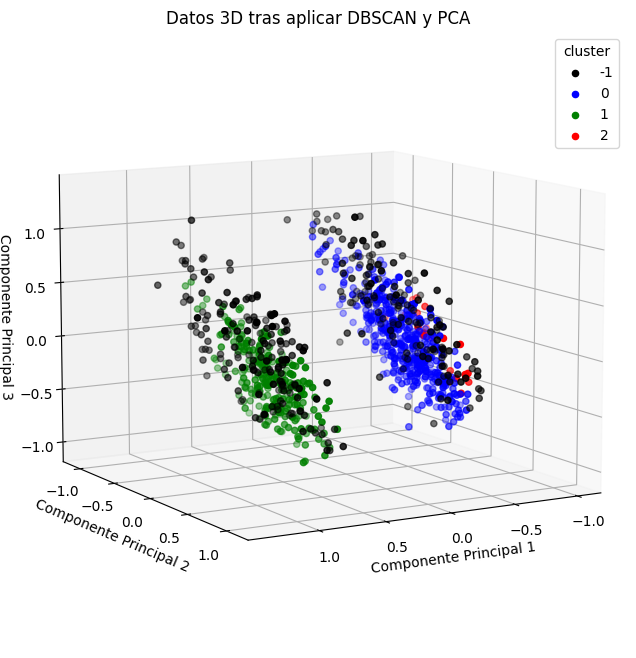

In [281]:
# Crear figura y eje tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtener los labels únicos para garantizar que cada cluster solo se añada una vez a la leyenda
unique_labels = np.unique(labels_dbscan)

for label in unique_labels:
    # Seleccionar puntos que pertenecen al cluster actual
    indices = labels_dbscan == label
    cluster_points = X_pca_3[indices]
    # Graficar puntos de este cluster en 3D
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], color=colores[label], label=label)

# Ajustar ángulos de vista para una mejor visualización
ax.view_init(elev=10, azim=60)

# Ajustes de la vista del gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title("Datos 3D tras aplicar DBSCAN y PCA")
ax.legend(title='cluster')

# Mostrar el gráfico
plt.show()

Como curiosidad, observemos la diferencia de aplicar K-Means y DBSCAN después de aplicar la reducción de la dimensionalidad.

Con ello este cambio en el orden, podemos obtener cluster diferentes a los que obtuvimos aplicando los algoritmos de clusterización directamente a los datos, aunque DBSCAN sigue dejando algún outlier.

In [287]:
# Instancia y entrenamiento con Kmeans con 2 clusteres.
clusterer_kmeans_2_pca = KMeans(n_clusters=2, n_init='auto', random_state=42)
labels_kmeans_2_pca = clusterer_kmeans_2_pca.fit_predict(X_pca_3)
pd.Series(labels_kmeans_2_pca).value_counts()

0    596
1    404
Name: count, dtype: int64

In [271]:
# Instancia y entrenamiento con DBSCAN.
clusterer_dbscan_cpa = DBSCAN(eps=0.35, min_samples=10)
labels_dbscan_pca = clusterer_dbscan_cpa.fit_predict(X_pca_3)
pd.Series(labels_dbscan_pca).value_counts()

 1    595
 0    403
-1      2
Name: count, dtype: int64

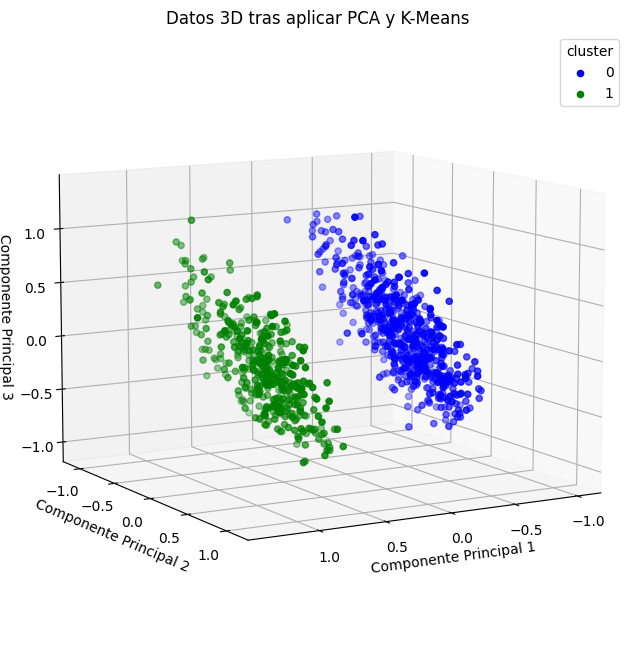

In [289]:
# Crear figura y eje tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtener los labels únicos para garantizar que cada cluster solo se añada una vez a la leyenda
unique_labels = np.unique(labels_kmeans_2_pca)

for label in unique_labels:
    # Seleccionar puntos que pertenecen al cluster actual
    indices = labels_kmeans_2_pca == label
    cluster_points = X_pca_3[indices]
    # Graficar puntos de este cluster en 3D
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], color=colores[label], label=label)

# Ajustar ángulos de vista para una mejor visualización
ax.view_init(elev=10, azim=60)

# Ajustes de la vista del gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title("Datos 3D tras aplicar PCA y K-Means")
ax.legend(title='cluster')

# Mostrar el gráfico
plt.show()

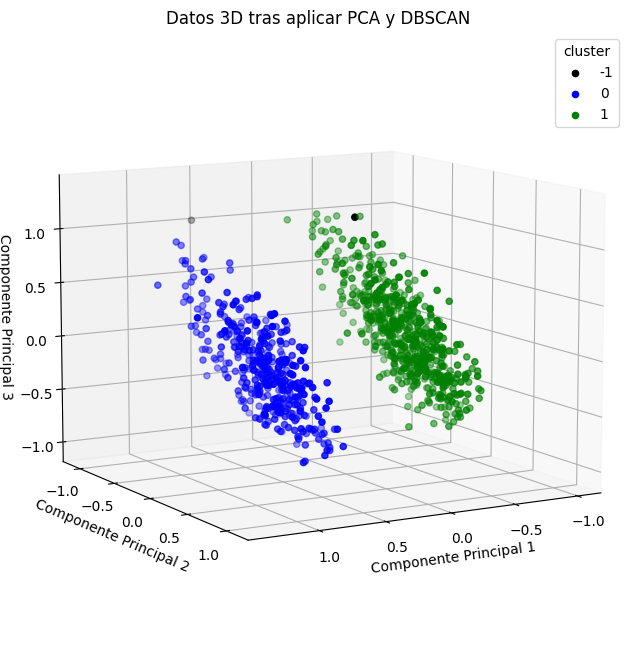

In [280]:
# Crear figura y eje tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtener los labels únicos para garantizar que cada cluster solo se añada una vez a la leyenda
unique_labels = np.unique(labels_dbscan_pca)

for label in unique_labels:
    # Seleccionar puntos que pertenecen al cluster actual
    indices = labels_dbscan_pca == label
    cluster_points = X_pca_3[indices]
    # Graficar puntos de este cluster en 3D
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], color=colores[label], label=label)

# Ajustar ángulos de vista para una mejor visualización
ax.view_init(elev=10, azim=60)

# Ajustes de la vista del gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title("Datos 3D tras aplicar PCA y DBSCAN")
ax.legend(title='cluster')

# Mostrar el gráfico
plt.show()

# Exportar a excel

Finalmente vamos a exportar a una hoja de cálculo los datos con las etiquetas de los modelos K-means seleccionados.

In [290]:
original_data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [291]:
data_output = original_data.copy()

# KMeans con 2 clusteres
data_output['class'] = labels_kmeans_2
data_output

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,0
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,0
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,1


In [292]:
data.to_excel('grouped_clients_kmeans_2.xlsx')

Aprovechamos para guardar también un excel con el clustering de 4 grupos y con el de 2 grupos tras la reducción decomponentes.

In [294]:
# KMeans con 4 clusteres
data_output['class'] = labels_kmeans_4
data.to_excel('grouped_clients_kmeans_4.xlsx')
# KMeans con 2 clusteres tras PCA
data_output['class'] = labels_kmeans_2_pca
data.to_excel('grouped_clients_pca_kmeans_2.xlsx')